In [1]:
import datetime, os, pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#functions from LSTM script commented '#LSTM'
from Scripts.LSTM import *

%matplotlib inline
plt.style.use('seaborn-whitegrid')

models_path = os.path.join('..', 'models')
images_path = os.path.join('..', 'images')

Using TensorFlow backend.


In [2]:
os.system("start C:/Users/Giedrius/Music/1.mp3") 

0

#### In theory deep learning models can approximate any continues function. In this jupyter notebook we do LSTM recurent neural network model tuning experiments on noisy Bitcoin price prediction models. But firstly lets look how powerful LSTM is forcasting     $f(x) = x\sin(x)/400$ 

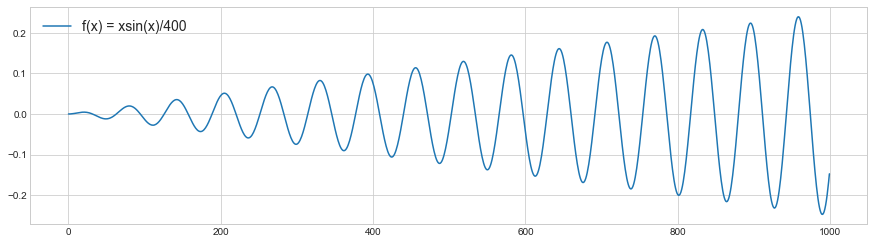

In [8]:
x = np.arange(0.0, 100, 0.1)
ts =  x*np.sin(x)/400
plt.figure(figsize=(15,4))
plt.plot(ts, label = "f(x) = xsin(x)/400")
plt.legend(prop={'size': 14})

In [10]:
window_size = 50
x_train, y_train, x_test, y_test, rows = transform_data(ts, window_size, normalise_window = False) #LSTM

In [50]:
if 1 == 0:
    model = build_model([1,128,128,1], dropout = [0,0]) #LSTM
    loss = model.fit(
        x_train,
        y_train,
        batch_size = 64,
        nb_epoch = 100,
        validation_split = 0.2)
    model.save(os.path.join(models_path, "xsinx"))
else:
    model = load_network(os.path.join(models_path, "xsinx")) #LSTM

> Compilation Time :  0.038364410400390625
Train on 684 samples, validate on 171 samples
Epoch 1/100
684/684 [==============================] - 4s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 5.0598e-04 - val_acc: 0.0000e+00
Epoch 2/100
684/684 [==============================] - 1s - loss: 3.8907e-04 - acc: 0.0000e+00 - val_loss: 1.5237e-04 - val_acc: 0.0000e+00
Epoch 3/100
684/684 [==============================] - 1s - loss: 1.4125e-04 - acc: 0.0000e+00 - val_loss: 2.9103e-05 - val_acc: 0.0000e+00
Epoch 4/100
684/684 [==============================] - 1s - loss: 2.8708e-05 - acc: 0.0000e+00 - val_loss: 2.1414e-05 - val_acc: 0.0000e+00
Epoch 5/100
684/684 [==============================] - 1s - loss: 1.0846e-05 - acc: 0.0000e+00 - val_loss: 1.2720e-05 - val_acc: 0.0000e+00
Epoch 6/100
684/684 [==============================] - 1s - loss: 5.8021e-06 - acc: 0.0000e+00 - val_loss: 4.2464e-06 - val_acc: 0.0000e+00
Epoch 7/100
684/684 [==============================] - 1s - loss: 2.0775e-0

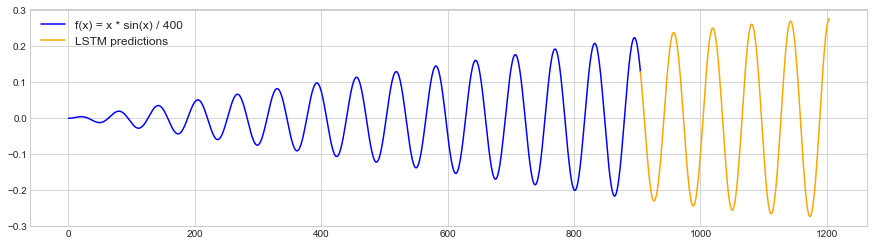

In [11]:
#create variable for ploting
predictions = predict_sequence_full(model, x_test, window_size, 300) #LSTM
none = [None]*(len(y_train)+ window_size)
ts1 = []
ts1.extend(none)
ts1.extend(predictions)
#plot
plt.figure(figsize=(15,4))
plt.plot(ts[:-(len(y_test)-1)], color='blue', label = 'f(x) = x * sin(x) / 400')
plt.plot(ts1, color='orange', label= 'LSTM predictions')
plt.legend(prop={'size': 12})

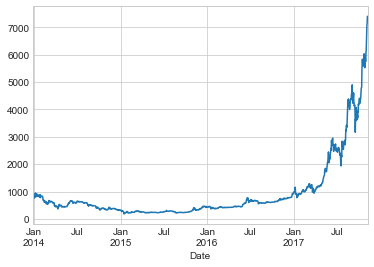

In [2]:
urlMarket = 'http://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20131227&end=20171106'
df2 = pd.read_html(urlMarket)[0]
df2.index  = [datetime.datetime.strptime(date, '%b %d, %Y') for date in df2["Date"]]
df2.index.name = 'Date'
df2 = df2[['Open','Volume']].sort_index()
df = df2['Open'].sort_index()
df.plot()

In [3]:
window_size = 50
x_train, y_train, x_test, y_test, rows = transform_data(df, window_size, True, )
y_test_usd = get_real_value(y_test, df,rows)

### Primary LSTM models parametres:
* neurons 32,32 
* dropout 0.3
* epochs 250
* window size 50

With these LSTM parameters we first tune the number of batches. Every batches configuration repeated 3 times.

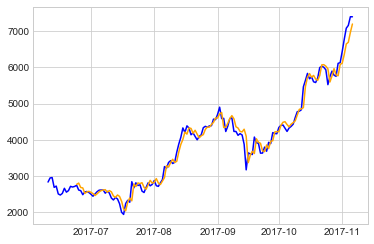

In [34]:
plt.plot(df[-150:], color='blue')
plt.plot(a[-150:], color='orange')

In [5]:
%%time

pred_len = 10
repeats = 3
i = 0
neurons = [32,64,128,256]
result = []

for n1 in neurons:
    for n2 in neurons:

        rmse_scores = list()
        mape_scores = list()
    
        for r in range(repeats):
        
            # fit the model
            model = build_model([1,n1,n2,1])
            loss = model.fit(
                x_train,
                y_train,
                batch_size=64,
                nb_epoch=250,
                validation_split=0.2)
        
            # forecast test dataset
            predictions = predict_sequences_multiple(model, x_test, window_size, pred_len, True)
            predictions_usd = get_seq_real_values(predictions, df, rows)

            rmse, mape = calculate_error(predictions_usd, np.array(y_test_usd), pred_len)
            rmse_scores.append(rmse)
            mape_scores.append(mape)
            print('%d) RMSE: %.3f   MAPE: %.2f' % (r+1, rmse[0], mape[0]))
        
            plt.plot(loss.history["loss"], color='blue', label = "Train loss" if r == 0 else "")
            plt.plot(loss.history["val_loss"], color='orange', label = "Validation loss" if r == 0 else "")
    
    
        result.append((np.mean(rmse_scores, axis = 0),
                       np.mean( mape_scores, axis = 0)))
        plt.legend()
        plt.savefig(os.path.join(images_path, 'neurons'+ str(n1) + '_' + str(n2) + '.png'))
        plt.clf()

> Compilation Time :  0.09465503692626953
Train on 980 samples, validate on 245 samples
Epoch 1/250
980/980 [==============================] - 9s - loss: 0.0274 - acc: 0.0000e+00 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 2/250
980/980 [==============================] - 2s - loss: 0.0111 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 3/250
980/980 [==============================] - 2s - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 4/250
980/980 [==============================] - 2s - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.0044 - val_acc: 0.0000e+00
Epoch 5/250
980/980 [==============================] - 2s - loss: 0.0075 - acc: 0.0000e+00 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 6/250
980/980 [==============================] - 2s - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 7/250
980/980 [==============================] - 2s - loss: 0.0070 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc:

980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 63/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 64/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 65/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 66/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 67/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 68/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 69/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 185/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 186/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 187/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 188/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 189/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 190/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 9.8668e-04 - val_acc: 0.0000e+00
Epoch 191/250
980/980 [==============================] - 2s - loss: 0.00

980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 55/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 56/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 57/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 58/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 59/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 60/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 61/250
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 177/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 178/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 179/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 180/250
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 181/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 182/250
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 183/250
980/980 [==============================] - 2s - loss: 0.0033 -

980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 48/250
980/980 [==============================] - 2s - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 49/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 50/250
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 51/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 52/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 53/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 54/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 170/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 171/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 172/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 173/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 174/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 175/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 176/250
980/980 [==============================] - 2s - loss: 0.0032 -

980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 41/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 42/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 43/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 44/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 45/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 46/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 47/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 163/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 164/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 165/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 166/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 167/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.9853e-04 - val_acc: 0.0000e+00
Epoch 168/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 169/250
980/980 [==============================] - 2s - loss: 0.00

980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 33/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 34/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 35/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 36/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 37/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 38/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 39/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 155/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 156/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 157/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 158/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 159/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 160/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 161/250
980/980 [==============================] - 2s - loss: 0.0027 -

980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 24/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 25/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 26/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 27/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 28/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 29/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 30/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 146/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 147/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 148/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 149/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 150/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 151/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 152/250
980/980 [==============================] - 2s - loss: 0.0025 -

980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 15/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 16/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 17/250
980/980 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 18/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 19/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 20/250
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 21/250
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 137/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 138/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 139/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 140/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 141/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.8866e-04 - val_acc: 0.0000e+00
Epoch 142/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 143/250
980/980 [==============================] - 2s - loss: 0.00

980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 6/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 7/250
980/980 [==============================] - 2s - loss: 0.0049 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 8/250
980/980 [==============================] - 2s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 9/250
980/980 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 10/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 11/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 12/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.000

980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 128/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 129/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 130/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 131/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 132/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 133/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 134/250
980/980 [==============================] - 2s - loss: 0.0022 -

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.4488e-04 - val_acc: 0.0000e+00
Epoch 248/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.2872e-04 - val_acc: 0.0000e+00
Epoch 249/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.9644e-04 - val_acc: 0.0000e+00
Epoch 250/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
2) RMSE: 218.860   MAPE: 0.04
> Compilation Time :  0.034590959548950195
Train on 980 samples, validate on 245 samples
Epoch 1/250
980/980 [==============================] - 3s - loss: 0.0283 - acc: 0.0000e+00 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 2/250
980/980 [==============================] - 2s - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 3/250
980/980 [==============================] - 2s - loss: 0.0058 - acc: 0.0

980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 119/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 120/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 121/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 122/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 123/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 124/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 125/250
980/980 [==============================] - 2s - loss: 0.0022 -

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 239/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 240/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.9683e-04 - val_acc: 0.0000e+00
Epoch 241/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 242/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.6601e-04 - val_acc: 0.0000e+00
Epoch 243/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.0153e-04 - val_acc: 0.0000e+00
Epoch 244/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 245/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 110/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 111/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.7873e-04 - val_acc: 0.0000e+00
Epoch 112/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 113/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 114/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 115/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 116/250
980/980 [==============================] - 2s - loss: 0.00

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.5101e-04 - val_acc: 0.0000e+00
Epoch 230/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.7237e-04 - val_acc: 0.0000e+00
Epoch 231/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.8194e-04 - val_acc: 0.0000e+00
Epoch 232/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 233/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 8.9412e-04 - val_acc: 0.0000e+00
Epoch 234/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.8923e-04 - val_acc: 0.0000e+00
Epoch 235/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.8037e-04 - val_acc: 0.0000e+00
Epoch 236/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 101/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 102/250
980/980 [==============================] - 3s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 103/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 104/250
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 105/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 106/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 107/250
980/980 [==============================] - 2s - loss: 0.0021 -

980/980 [==============================] - 3s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 221/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 222/250
980/980 [==============================] - 3s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.7743e-04 - val_acc: 0.0000e+00
Epoch 223/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.3226e-04 - val_acc: 0.0000e+00
Epoch 224/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.4832e-04 - val_acc: 0.0000e+00
Epoch 225/250
980/980 [==============================] - 3s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.9406e-04 - val_acc: 0.0000e+00
Epoch 226/250
980/980 [==============================] - 3s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.4006e-04 - val_acc: 0.0000e+00
Epoch 227/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 31/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 32/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 33/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 34/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 35/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 36/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 37/250
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 152/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.5285e-04 - val_acc: 0.0000e+00
Epoch 153/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 154/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 155/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.5193e-04 - val_acc: 0.0000e+00
Epoch 156/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.3372e-04 - val_acc: 0.0000e+00
Epoch 157/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.4184e-04 - val_acc: 0.0000e+00
Epoch 158/250
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 21/250
980/980 [==============================] - 2s - loss: 0.0051 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 22/250
980/980 [==============================] - 2s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 23/250
980/980 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 24/250
980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 25/250
980/980 [==============================] - 2s - loss: 0.0049 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 26/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 27/250
980/980 [==============================] - 2s - loss: 0.0045 - acc: 0

980/980 [==============================] - 8s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 143/250
980/980 [==============================] - 13s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 144/250
980/980 [==============================] - 8s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 145/250
980/980 [==============================] - 7s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 146/250
980/980 [==============================] - 8s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 147/250
980/980 [==============================] - 10s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 148/250
980/980 [==============================] - 9s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 149/250
980/980 [==============================] - 9s - loss: 0.0033

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.9821e-04 - val_acc: 0.0000e+00
Epoch 204/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6790e-04 - val_acc: 0.0000e+00
Epoch 205/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 206/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.4493e-04 - val_acc: 0.0000e+00
Epoch 207/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 208/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 209/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 210/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 74/250
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 75/250
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 76/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 77/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 78/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 79/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 80/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0

980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 195/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 9.6294e-04 - val_acc: 0.0000e+00
Epoch 196/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.7176e-04 - val_acc: 0.0000e+00
Epoch 197/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 198/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9567e-04 - val_acc: 0.0000e+00
Epoch 199/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.6993e-04 - val_acc: 0.0000e+00
Epoch 200/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 201/250
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 65/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 66/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 67/250
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 68/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 69/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 70/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 71/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 187/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.7401e-04 - val_acc: 0.0000e+00
Epoch 188/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.9646e-04 - val_acc: 0.0000e+00
Epoch 189/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 190/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 9.4563e-04 - val_acc: 0.0000e+00
Epoch 191/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 192/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.6368e-04 - val_acc: 0.0000e+00
Epoch 193/250
980/980 [==============================] - 2s 

980/980 [==============================] - 10s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 57/250
980/980 [==============================] - 10s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 58/250
980/980 [==============================] - 10s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 59/250
980/980 [==============================] - 10s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 60/250
980/980 [==============================] - 10s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 61/250
980/980 [==============================] - 10s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 62/250
980/980 [==============================] - 10s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 63/250
980/980 [==============================] - 10s - loss: 0.0025 

980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 178/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.1842e-04 - val_acc: 0.0000e+00
Epoch 179/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 8.9035e-04 - val_acc: 0.0000e+00
Epoch 180/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.1798e-04 - val_acc: 0.0000e+00
Epoch 181/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.5923e-04 - val_acc: 0.0000e+00
Epoch 182/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.1566e-04 - val_acc: 0.0000e+00
Epoch 183/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.2119e-04 - val_acc: 0.0000e+00
Epoch 184/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 47/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 48/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 49/250
980/980 [==============================] - 3s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 50/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 51/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 52/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 53/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.1368e-04 - val_acc: 0.0000e+00
Epoch 168/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.5992e-04 - val_acc: 0.0000e+00
Epoch 169/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 170/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 171/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.7241e-04 - val_acc: 0.0000e+00
Epoch 172/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 173/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.7000e-04 - val_acc: 0.0000e+00
Epoch 174/250
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 37/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 38/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 39/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 40/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 41/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 42/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 43/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0

980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 158/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.3854e-04 - val_acc: 0.0000e+00
Epoch 159/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.3314e-04 - val_acc: 0.0000e+00
Epoch 160/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 161/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.1115e-04 - val_acc: 0.0000e+00
Epoch 162/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 163/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 164/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4294e-04 - val_acc: 0.0000e+00
Epoch 218/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.5237e-04 - val_acc: 0.0000e+00
Epoch 219/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.1545e-04 - val_acc: 0.0000e+00
Epoch 220/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4332e-04 - val_acc: 0.0000e+00
Epoch 221/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.8014e-04 - val_acc: 0.0000e+00
Epoch 222/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4870e-04 - val_acc: 0.0000e+00
Epoch 223/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.7746e-04 - val_acc: 0.0000e+00
Epoch 224/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 88/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 89/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 90/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 91/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 92/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 93/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 94/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0

980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.3606e-04 - val_acc: 0.0000e+00
Epoch 207/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.5327e-04 - val_acc: 0.0000e+00
Epoch 208/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.0427e-04 - val_acc: 0.0000e+00
Epoch 209/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.2964e-04 - val_acc: 0.0000e+00
Epoch 210/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 211/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 212/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.9949e-04 - val_acc: 0.0000e+00
Epoch 213/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 77/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 78/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 79/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 80/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 81/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 82/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 83/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0

980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.6474e-04 - val_acc: 0.0000e+00
Epoch 138/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.8082e-04 - val_acc: 0.0000e+00
Epoch 139/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 8.7989e-04 - val_acc: 0.0000e+00
Epoch 140/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.3376e-04 - val_acc: 0.0000e+00
Epoch 141/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.3233e-04 - val_acc: 0.0000e+00
Epoch 142/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.1254e-04 - val_acc: 0.0000e+00
Epoch 143/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.9370e-04 - val_acc: 0.0000e+00
Epoch 144/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 6/250
980/980 [==============================] - 2s - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 7/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 8/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 9/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 10/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 11/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 12/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.000

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.1964e-04 - val_acc: 0.0000e+00
Epoch 128/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.9657e-04 - val_acc: 0.0000e+00
Epoch 129/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.5286e-04 - val_acc: 0.0000e+00
Epoch 130/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.2491e-04 - val_acc: 0.0000e+00
Epoch 131/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 132/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 133/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.2173e-04 - val_acc: 0.0000e+00
Epoch 134/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.3296e-04 - val_acc: 0.0000e+00
Epoch 246/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.6234e-04 - val_acc: 0.0000e+00
Epoch 247/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.3689e-04 - val_acc: 0.0000e+00
Epoch 248/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.4103e-04 - val_acc: 0.0000e+00
Epoch 249/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.6413e-04 - val_acc: 0.0000e+00
Epoch 250/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.6940e-04 - val_acc: 0.0000e+00
3) RMSE: 208.848   MAPE: 0.04
> Compilation Time :  0.04108238220214844
Train on 980 samples, validate on 245 samples
Epoch 1/250
980/980 [==============================] - 5s - loss: 0.

980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 117/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.3156e-04 - val_acc: 0.0000e+00
Epoch 118/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 119/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 120/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.9447e-04 - val_acc: 0.0000e+00
Epoch 121/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.4801e-04 - val_acc: 0.0000e+00
Epoch 122/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 123/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.6572e-04 - val_acc: 0.0000e+00
Epoch 236/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.9776e-04 - val_acc: 0.0000e+00
Epoch 237/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.1467e-04 - val_acc: 0.0000e+00
Epoch 238/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.3679e-04 - val_acc: 0.0000e+00
Epoch 239/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.0640e-04 - val_acc: 0.0000e+00
Epoch 240/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.6870e-04 - val_acc: 0.0000e+00
Epoch 241/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.1026e-04 - val_acc: 0.0000e+00
Epoch 242/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 107/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 108/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.5543e-04 - val_acc: 0.0000e+00
Epoch 109/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.0500e-04 - val_acc: 0.0000e+00
Epoch 110/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.5342e-04 - val_acc: 0.0000e+00
Epoch 111/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.9873e-04 - val_acc: 0.0000e+00
Epoch 112/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 113/250
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.8086e-04 - val_acc: 0.0000e+00
Epoch 227/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.1223e-04 - val_acc: 0.0000e+00
Epoch 228/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.6139e-04 - val_acc: 0.0000e+00
Epoch 229/250
980/980 [==============================] - 3s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.0254e-04 - val_acc: 0.0000e+00
Epoch 230/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.8215e-04 - val_acc: 0.0000e+00
Epoch 231/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.0161e-04 - val_acc: 0.0000e+00
Epoch 232/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.3401e-04 - val_acc: 0.0000e+00
Epoch 233/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.2283e-04 - val_acc: 0.0000e+00
Epoch 98/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.4589e-04 - val_acc: 0.0000e+00
Epoch 99/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.8496e-04 - val_acc: 0.0000e+00
Epoch 100/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 101/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 102/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.3508e-04 - val_acc: 0.0000e+00
Epoch 103/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.8762e-04 - val_acc: 0.0000e+00
Epoch 104/250
980/980 [==============================] - 2

980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 218/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.6960e-04 - val_acc: 0.0000e+00
Epoch 219/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 220/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 221/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.6551e-04 - val_acc: 0.0000e+00
Epoch 222/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 223/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 224/250
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 28/250
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 29/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 30/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 31/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 32/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 33/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 34/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.5992e-04 - val_acc: 0.0000e+00
Epoch 150/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.7282e-04 - val_acc: 0.0000e+00
Epoch 151/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.7798e-04 - val_acc: 0.0000e+00
Epoch 152/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 153/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.7811e-04 - val_acc: 0.0000e+00
Epoch 154/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.5459e-04 - val_acc: 0.0000e+00
Epoch 155/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 9.3609e-04 - val_acc: 0.0000e+00
Epoch 156/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 20/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 21/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 22/250
980/980 [==============================] - 2s - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 23/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 24/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 25/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 26/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 142/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 143/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 144/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.8967e-04 - val_acc: 0.0000e+00
Epoch 145/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.7949e-04 - val_acc: 0.0000e+00
Epoch 146/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.6523e-04 - val_acc: 0.0000e+00
Epoch 147/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 148/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0051 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 11/250
980/980 [==============================] - 2s - loss: 0.0051 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 12/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 13/250
980/980 [==============================] - 2s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 14/250
980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 15/250
980/980 [==============================] - 2s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 16/250
980/980 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 17/250
980/980 [==============================] - 2s - loss: 0.0045 - acc: 0

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 133/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 134/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 135/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 136/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6214e-04 - val_acc: 0.0000e+00
Epoch 137/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 138/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 139/250
980/980 [==============================] - 2s - loss: 0.00

980/980 [==============================] - 5s - loss: 0.0229 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 2/250
980/980 [==============================] - 2s - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 3/250
980/980 [==============================] - 2s - loss: 0.0061 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 4/250
980/980 [==============================] - 2s - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 5/250
980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 6/250
980/980 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 7/250
980/980 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 8/250
980/980 [==============================] - 2s - loss: 0.0046 - acc: 0.0000e+

980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.2225e-04 - val_acc: 0.0000e+00
Epoch 124/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.3016e-04 - val_acc: 0.0000e+00
Epoch 125/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 126/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.9527e-04 - val_acc: 0.0000e+00
Epoch 127/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 8.8739e-04 - val_acc: 0.0000e+00
Epoch 128/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.4344e-04 - val_acc: 0.0000e+00
Epoch 129/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 130/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 242/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 243/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 244/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.9685e-04 - val_acc: 0.0000e+00
Epoch 245/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 8.8814e-04 - val_acc: 0.0000e+00
Epoch 246/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.8996e-04 - val_acc: 0.0000e+00
Epoch 247/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.4125e-04 - val_acc: 0.0000e+00
Epoch 248/250
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 113/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 114/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.5483e-04 - val_acc: 0.0000e+00
Epoch 115/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.5778e-04 - val_acc: 0.0000e+00
Epoch 116/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.2787e-04 - val_acc: 0.0000e+00
Epoch 117/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.7028e-04 - val_acc: 0.0000e+00
Epoch 118/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4290e-04 - val_acc: 0.0000e+00
Epoch 119/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.2891e-04 - val_acc: 0.0000e+00
Epoch 173/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.9941e-04 - val_acc: 0.0000e+00
Epoch 174/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.0085e-04 - val_acc: 0.0000e+00
Epoch 175/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 176/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 177/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.5232e-04 - val_acc: 0.0000e+00
Epoch 178/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.9904e-04 - val_acc: 0.0000e+00
Epoch 179/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 42/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 43/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 44/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 45/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 46/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 47/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 48/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 8.9649e-04 - val_acc: 0.0000e+00
Epoch 163/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.1407e-04 - val_acc: 0.0000e+00
Epoch 164/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.0000e-04 - val_acc: 0.0000e+00
Epoch 165/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 8.9871e-04 - val_acc: 0.0000e+00
Epoch 166/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.8582e-04 - val_acc: 0.0000e+00
Epoch 167/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 8.7807e-04 - val_acc: 0.0000e+00
Epoch 168/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.0075e-04 - val_acc: 0.0000e+00
Epoch 169/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 31/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 32/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 33/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 34/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 35/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 36/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 37/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0

980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.7859e-04 - val_acc: 0.0000e+00
Epoch 152/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.0048e-04 - val_acc: 0.0000e+00
Epoch 153/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 154/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.3636e-04 - val_acc: 0.0000e+00
Epoch 155/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.7121e-04 - val_acc: 0.0000e+00
Epoch 156/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.4046e-04 - val_acc: 0.0000e+00
Epoch 157/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.5500e-04 - val_acc: 0.0000e+00
Epoch 158/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 20/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 21/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 22/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 23/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 24/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 25/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 26/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.6204e-04 - val_acc: 0.0000e+00
Epoch 141/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.5108e-04 - val_acc: 0.0000e+00
Epoch 142/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 143/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.6753e-04 - val_acc: 0.0000e+00
Epoch 144/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.1048e-04 - val_acc: 0.0000e+00
Epoch 145/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.2113e-04 - val_acc: 0.0000e+00
Epoch 146/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.2588e-04 - val_acc: 0.0000e+00
Epoch 147/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 9/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 10/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 11/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 12/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 13/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 14/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 15/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.9148e-04 - val_acc: 0.0000e+00
Epoch 130/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.2638e-04 - val_acc: 0.0000e+00
Epoch 131/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.7099e-04 - val_acc: 0.0000e+00
Epoch 132/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.8968e-04 - val_acc: 0.0000e+00
Epoch 133/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.8341e-04 - val_acc: 0.0000e+00
Epoch 134/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.5228e-04 - val_acc: 0.0000e+00
Epoch 135/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.5761e-04 - val_acc: 0.0000e+00
Epoch 136/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.3636e-04 - val_acc: 0.0000e+00
Epoch 248/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.0453e-04 - val_acc: 0.0000e+00
Epoch 249/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.7189e-04 - val_acc: 0.0000e+00
Epoch 250/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.7308e-04 - val_acc: 0.0000e+00
3) RMSE: 207.172   MAPE: 0.04
> Compilation Time :  0.02356243133544922
Train on 980 samples, validate on 245 samples
Epoch 1/250
980/980 [==============================] - 5s - loss: 0.0188 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 2/250
980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 3/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 118/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 119/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 120/250
980/980 [==============================] - 3s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 121/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.5597e-04 - val_acc: 0.0000e+00
Epoch 122/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.9583e-04 - val_acc: 0.0000e+00
Epoch 123/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.9782e-04 - val_acc: 0.0000e+00
Epoch 124/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.2690e-04 - val_acc: 0.0000e+00
Epoch 236/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.0008e-04 - val_acc: 0.0000e+00
Epoch 237/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.7801e-04 - val_acc: 0.0000e+00
Epoch 238/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.1169e-04 - val_acc: 0.0000e+00
Epoch 239/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.0231e-04 - val_acc: 0.0000e+00
Epoch 240/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.8428e-04 - val_acc: 0.0000e+00
Epoch 241/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 242/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.2069e-04 - val_acc: 0.0000e+00
Epoch 106/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.2703e-04 - val_acc: 0.0000e+00
Epoch 107/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 108/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.9108e-04 - val_acc: 0.0000e+00
Epoch 109/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.3314e-04 - val_acc: 0.0000e+00
Epoch 110/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.7551e-04 - val_acc: 0.0000e+00
Epoch 111/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 112/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.9942e-04 - val_acc: 0.0000e+00
Epoch 224/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.9882e-04 - val_acc: 0.0000e+00
Epoch 225/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 226/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.1324e-04 - val_acc: 0.0000e+00
Epoch 227/250
980/980 [==============================] - 2s - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 9.0349e-04 - val_acc: 0.0000e+00
Epoch 228/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.0719e-04 - val_acc: 0.0000e+00
Epoch 229/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.0178e-04 - val_acc: 0.0000e+00
Epoch 230/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 34/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 35/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 36/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 37/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 38/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 39/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 40/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.1268e-04 - val_acc: 0.0000e+00
Epoch 154/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.3219e-04 - val_acc: 0.0000e+00
Epoch 155/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 8.7435e-04 - val_acc: 0.0000e+00
Epoch 156/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.1543e-04 - val_acc: 0.0000e+00
Epoch 157/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.6684e-04 - val_acc: 0.0000e+00
Epoch 158/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 159/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.4657e-04 - val_acc: 0.0000e+00
Epoch 160/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 22/250
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 23/250
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 24/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 25/250
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 26/250
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 27/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 28/250
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.2293e-04 - val_acc: 0.0000e+00
Epoch 143/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 144/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 145/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 146/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.8980e-04 - val_acc: 0.0000e+00
Epoch 147/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 148/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 8.9788e-04 - val_acc: 0.0000e+00
Epoch 149/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 12/250
980/980 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 13/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 14/250
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 15/250
980/980 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 16/250
980/980 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 17/250
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 18/250
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 134/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7011e-04 - val_acc: 0.0000e+00
Epoch 135/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 136/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 137/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.9573e-04 - val_acc: 0.0000e+00
Epoch 138/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 139/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.4546e-04 - val_acc: 0.0000e+00
Epoch 140/250
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0071 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 3/250
980/980 [==============================] - 2s - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 4/250
980/980 [==============================] - 2s - loss: 0.0063 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 5/250
980/980 [==============================] - 2s - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 6/250
980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 7/250
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 8/250
980/980 [==============================] - 2s - loss: 0.0052 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 9/250
980/980 [==============================] - 2s - loss: 0.0045 - acc: 0.0000e+

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5391e-04 - val_acc: 0.0000e+00
Epoch 125/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6991e-04 - val_acc: 0.0000e+00
Epoch 126/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 127/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.4331e-04 - val_acc: 0.0000e+00
Epoch 128/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.1879e-04 - val_acc: 0.0000e+00
Epoch 129/250
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.2513e-04 - val_acc: 0.0000e+00
Epoch 130/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.6824e-04 - val_acc: 0.0000e+00
Epoch 131/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5803e-04 - val_acc: 0.0000e+00
Epoch 243/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3593e-04 - val_acc: 0.0000e+00
Epoch 244/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.4540e-04 - val_acc: 0.0000e+00
Epoch 245/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.9912e-04 - val_acc: 0.0000e+00
Epoch 246/250
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 247/250
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.8003e-04 - val_acc: 0.0000e+00
Epoch 248/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.9822e-04 - val_acc: 0.0000e+00
Epoch 249/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 113/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 114/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.2994e-04 - val_acc: 0.0000e+00
Epoch 115/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.9985e-04 - val_acc: 0.0000e+00
Epoch 116/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.4980e-04 - val_acc: 0.0000e+00
Epoch 117/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.1576e-04 - val_acc: 0.0000e+00
Epoch 118/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.2238e-04 - val_acc: 0.0000e+00
Epoch 119/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 8.7720e-04 - val_acc: 0.0000e+00
Epoch 231/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 8.6520e-04 - val_acc: 0.0000e+00
Epoch 232/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.8541e-04 - val_acc: 0.0000e+00
Epoch 233/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.9770e-04 - val_acc: 0.0000e+00
Epoch 234/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 8.7611e-04 - val_acc: 0.0000e+00
Epoch 235/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.8218e-04 - val_acc: 0.0000e+00
Epoch 236/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.6771e-04 - val_acc: 0.0000e+00
Epoch 237/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 102/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.1450e-04 - val_acc: 0.0000e+00
Epoch 103/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.9468e-04 - val_acc: 0.0000e+00
Epoch 104/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.0655e-04 - val_acc: 0.0000e+00
Epoch 105/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.2458e-04 - val_acc: 0.0000e+00
Epoch 106/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 107/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.4641e-04 - val_acc: 0.0000e+00
Epoch 108/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.7157e-04 - val_acc: 0.0000e+00
Epoch 220/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 8.9134e-04 - val_acc: 0.0000e+00
Epoch 221/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.2734e-04 - val_acc: 0.0000e+00
Epoch 222/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.2692e-04 - val_acc: 0.0000e+00
Epoch 223/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 224/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 225/250
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 8.7318e-04 - val_acc: 0.0000e+00
Epoch 226/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.3204e-04 - val_acc: 0.0000e+00
Epoch 90/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.6382e-04 - val_acc: 0.0000e+00
Epoch 91/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.6075e-04 - val_acc: 0.0000e+00
Epoch 92/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 93/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 94/250
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.7693e-04 - val_acc: 0.0000e+00
Epoch 95/250
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.2618e-04 - val_acc: 0.0000e+00
Epoch 96/250
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.0016e-04 - val_acc: 0.0000e+00
Epoch 209/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.3758e-04 - val_acc: 0.0000e+00
Epoch 210/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 8.8180e-04 - val_acc: 0.0000e+00
Epoch 211/250
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 212/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.1837e-04 - val_acc: 0.0000e+00
Epoch 213/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.0491e-04 - val_acc: 0.0000e+00
Epoch 214/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.9215e-04 - val_acc: 0.0000e+00
Epoch 215/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.1808e-04 - val_acc: 0.0000e+00
Epoch 79/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.1435e-04 - val_acc: 0.0000e+00
Epoch 80/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 81/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 82/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 83/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 84/250
980/980 [==============================] - 2s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.9411e-04 - val_acc: 0.0000e+00
Epoch 85/250
980/980 [==============================] - 2s - loss: 0.0

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.6389e-04 - val_acc: 0.0000e+00
Epoch 197/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.8601e-04 - val_acc: 0.0000e+00
Epoch 198/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.9220e-04 - val_acc: 0.0000e+00
Epoch 199/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.2673e-04 - val_acc: 0.0000e+00
Epoch 200/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.7267e-04 - val_acc: 0.0000e+00
Epoch 201/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 202/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 203/250
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 6/250
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 7/250
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 8/250
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 9/250
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 10/250
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 11/250
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 12/250
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.000

980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.2684e-04 - val_acc: 0.0000e+00
Epoch 127/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.2931e-04 - val_acc: 0.0000e+00
Epoch 128/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.8306e-04 - val_acc: 0.0000e+00
Epoch 129/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.7071e-04 - val_acc: 0.0000e+00
Epoch 130/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.6225e-04 - val_acc: 0.0000e+00
Epoch 131/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.8635e-04 - val_acc: 0.0000e+00
Epoch 132/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.9504e-04 - val_acc: 0.0000e+00
Epoch 133/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.5911e-04 - val_acc: 0.0000e+00
Epoch 245/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.5350e-04 - val_acc: 0.0000e+00
Epoch 246/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 247/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.5861e-04 - val_acc: 0.0000e+00
Epoch 248/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.0402e-04 - val_acc: 0.0000e+00
Epoch 249/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.1745e-04 - val_acc: 0.0000e+00
Epoch 250/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
2) RMSE: 235.862   MAPE: 0.05
> Compilation Time :  0.04

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.5924e-04 - val_acc: 0.0000e+00
Epoch 115/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.7698e-04 - val_acc: 0.0000e+00
Epoch 116/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.7885e-04 - val_acc: 0.0000e+00
Epoch 117/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 8.7104e-04 - val_acc: 0.0000e+00
Epoch 118/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 119/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.9359e-04 - val_acc: 0.0000e+00
Epoch 120/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.1375e-04 - val_acc: 0.0000e+00
Epoch 121/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.6458e-04 - val_acc: 0.0000e+00
Epoch 233/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.4824e-04 - val_acc: 0.0000e+00
Epoch 234/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 235/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.6339e-04 - val_acc: 0.0000e+00
Epoch 236/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.0073e-04 - val_acc: 0.0000e+00
Epoch 237/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.1520e-04 - val_acc: 0.0000e+00
Epoch 238/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.6214e-04 - val_acc: 0.0000e+00
Epoch 239/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.7772e-04 - val_acc: 0.0000e+00
Epoch 103/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.7122e-04 - val_acc: 0.0000e+00
Epoch 104/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.5490e-04 - val_acc: 0.0000e+00
Epoch 105/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 106/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.8662e-04 - val_acc: 0.0000e+00
Epoch 107/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.9377e-04 - val_acc: 0.0000e+00
Epoch 108/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.5347e-04 - val_acc: 0.0000e+00
Epoch 109/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.1505e-04 - val_acc: 0.0000e+00
Epoch 221/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.9622e-04 - val_acc: 0.0000e+00
Epoch 222/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.9511e-04 - val_acc: 0.0000e+00
Epoch 223/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.2105e-04 - val_acc: 0.0000e+00
Epoch 224/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 8.8313e-04 - val_acc: 0.0000e+00
Epoch 225/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.8178e-04 - val_acc: 0.0000e+00
Epoch 226/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.3153e-04 - val_acc: 0.0000e+00
Epoch 227/250
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.8574e-04 - val_acc: 0.0000e+00
Epoch 90/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.0333e-04 - val_acc: 0.0000e+00
Epoch 91/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.4396e-04 - val_acc: 0.0000e+00
Epoch 92/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 9.3942e-04 - val_acc: 0.0000e+00
Epoch 93/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.6844e-04 - val_acc: 0.0000e+00
Epoch 94/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.0567e-04 - val_acc: 0.0000e+00
Epoch 95/250
980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.9712e-04 - val_acc: 0.0000e+00
Epoch 96/250
980/980 [==============================] 

980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 8.9825e-04 - val_acc: 0.0000e+00
Epoch 208/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 8.8729e-04 - val_acc: 0.0000e+00
Epoch 209/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 8.7999e-04 - val_acc: 0.0000e+00
Epoch 210/250
980/980 [==============================] - 2s - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 9.0334e-04 - val_acc: 0.0000e+00
Epoch 211/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.2334e-04 - val_acc: 0.0000e+00
Epoch 212/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 213/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.2786e-04 - val_acc: 0.0000e+00
Epoch 214/250
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 8.5319e-04 - val_acc: 0.0000e+00
Epoch 78/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 9.7959e-04 - val_acc: 0.0000e+00
Epoch 79/250
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 80/250
980/980 [==============================] - 2s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.3876e-04 - val_acc: 0.0000e+00
Epoch 81/250
980/980 [==============================] - 2s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 8.6081e-04 - val_acc: 0.0000e+00
Epoch 82/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.2763e-04 - val_acc: 0.0000e+00
Epoch 83/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.6809e-04 - val_acc: 0.0000e+00
Epoch 84/250
980/980 [==============================] - 2s

980/980 [==============================] - 2s - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 8.6526e-04 - val_acc: 0.0000e+00
Epoch 196/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 8.8153e-04 - val_acc: 0.0000e+00
Epoch 197/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 8.8402e-04 - val_acc: 0.0000e+00
Epoch 198/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 8.6993e-04 - val_acc: 0.0000e+00
Epoch 199/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 9.3710e-04 - val_acc: 0.0000e+00
Epoch 200/250
980/980 [==============================] - 2s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 201/250
980/980 [==============================] - 2s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 9.6876e-04 - val_acc: 0.0000e+00
Epoch 202/250
980/980 [=============================

In [2]:
#with open('result2', "rb") as f:
#   result = pickle.load(f)
#neurons = [32,64,128,256]
neurons_labels = [str(n1)+"_"+ str(n2) for n1 in neurons for n2 in neurons]
#result = [result[x] for x in range(2,48,3)]
rmse = [r[0] for r in result]
mape = [r[1] for r in result]

mape = pd.DataFrame(mape, index = neurons_labels).transpose()
rmse = pd.DataFrame(rmse, index = neurons_labels).transpose()

In [3]:
rmse.style.apply(highlight_min, axis=1)

In [4]:
mape.style.apply(highlight_min, axis=1)

From tables above we see that smallest MAPE and RMSE is in LSTM with 256 neurons in first layer and 32 neurons in second layer.

> Compilation Time :  0.04010653495788574
Train on 980 samples, validate on 245 samples
Epoch 1/300
980/980 [==============================] - 5s - loss: 0.0250 - acc: 0.0000e+00 - val_loss: 0.0061 - val_acc: 0.0000e+00
Epoch 2/300
980/980 [==============================] - 2s - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 3/300
980/980 [==============================] - 2s - loss: 0.0065 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 4/300
980/980 [==============================] - 2s - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 5/300
980/980 [==============================] - 3s - loss: 0.0062 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 6/300
980/980 [==============================] - 3s - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 7/300
980/980 [==============================] - 2s - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc:

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 63/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 64/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 65/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 66/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 67/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 68/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 69/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 124/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.5517e-04 - val_acc: 0.0000e+00
Epoch 125/300
980/980 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.4587e-04 - val_acc: 0.0000e+00
Epoch 126/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.1422e-04 - val_acc: 0.0000e+00
Epoch 127/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.9427e-04 - val_acc: 0.0000e+00
Epoch 128/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.9224e-04 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.3027e-04 - val_acc: 0.0000e+00
Epoch 242/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7731e-04 - val_acc: 0.0000e+00
Epoch 243/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.2265e-04 - val_acc: 0.0000e+00
Epoch 244/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.7411e-04 - val_acc: 0.0000e+00
Epoch 245/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1500e-04 - val_acc: 0.0000e+00
Epoch 246/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.3629e-04 - val_acc: 0.0000e+00
Epoch 247/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4152e-04 - val_acc: 0.0000e+00
Epoch 248/300
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4855e-04 - val_acc: 0.0000e+00
Epoch 60/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 61/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 62/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 63/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.1468e-04 - val_acc: 0.0000e+00
Epoch 64/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 65/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9667e-04 - val_acc: 0.0000e+00
Epoch 66/300
980/980 [==============================] - 2s - loss: 0.0

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.3146e-04 - val_acc: 0.0000e+00
Epoch 179/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7460e-04 - val_acc: 0.0000e+00
Epoch 180/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 181/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6756e-04 - val_acc: 0.0000e+00
Epoch 182/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.1648e-04 - val_acc: 0.0000e+00
Epoch 183/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.2855e-04 - val_acc: 0.0000e+00
Epoch 184/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 185/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4050e-04 - val_acc: 0.0000e+00
Epoch 297/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5123e-04 - val_acc: 0.0000e+00
Epoch 298/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.0725e-04 - val_acc: 0.0000e+00
Epoch 299/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.0903e-04 - val_acc: 0.0000e+00
Epoch 300/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2230e-04 - val_acc: 0.0000e+00
1 2) RMSE: 196.592   MAPE: 0.04
Train on 980 samples, validate on 245 samples
Epoch 1/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 2/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - va

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.1984e-04 - val_acc: 0.0000e+00
Epoch 116/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8464e-04 - val_acc: 0.0000e+00
Epoch 117/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.1409e-04 - val_acc: 0.0000e+00
Epoch 118/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.2571e-04 - val_acc: 0.0000e+00
Epoch 119/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 8.8117e-04 - val_acc: 0.0000e+00
Epoch 120/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.4631e-04 - val_acc: 0.0000e+00
Epoch 121/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 122/300
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.2608e-04 - val_acc: 0.0000e+00
Epoch 176/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 177/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.2834e-04 - val_acc: 0.0000e+00
Epoch 178/300
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.9139e-04 - val_acc: 0.0000e+00
Epoch 179/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.2197e-04 - val_acc: 0.0000e+00
Epoch 180/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.3514e-04 - val_acc: 0.0000e+00
Epoch 181/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 182/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.0652e-04 - val_acc: 0.0000e+00
Epoch 236/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 237/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 238/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.8647e-04 - val_acc: 0.0000e+00
Epoch 239/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 240/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 241/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.4338e-04 - val_acc: 0.0000e+00
Epoch 242/300
980/980 [==============================] - 2s - lo

980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.7274e-04 - val_acc: 0.0000e+00
Epoch 56/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8960e-04 - val_acc: 0.0000e+00
Epoch 57/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 58/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.9702e-04 - val_acc: 0.0000e+00
Epoch 59/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.9049e-04 - val_acc: 0.0000e+00
Epoch 60/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 61/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 62/300
980/980 [==============================] - 2s - loss:

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.7663e-04 - val_acc: 0.0000e+00
Epoch 176/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.2624e-04 - val_acc: 0.0000e+00
Epoch 177/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.7753e-04 - val_acc: 0.0000e+00
Epoch 178/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 179/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 180/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.6640e-04 - val_acc: 0.0000e+00
Epoch 181/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1547e-04 - val_acc: 0.0000e+00
Epoch 182/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.6639e-04 - val_acc: 0.0000e+00
Epoch 296/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 297/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 298/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 299/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.9055e-04 - val_acc: 0.0000e+00
Epoch 300/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.3934e-04 - val_acc: 0.0000e+00
1 4) RMSE: 195.461   MAPE: 0.04
Train on 980 samples, validate on 245 samples
Epoch 1/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.6342e-04 - val_

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.5703e-04 - val_acc: 0.0000e+00
Epoch 116/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 117/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 118/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8033e-04 - val_acc: 0.0000e+00
Epoch 119/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 120/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 121/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 122/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 236/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8804e-04 - val_acc: 0.0000e+00
Epoch 237/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8186e-04 - val_acc: 0.0000e+00
Epoch 238/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.2624e-04 - val_acc: 0.0000e+00
Epoch 239/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.9872e-04 - val_acc: 0.0000e+00
Epoch 240/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8697e-04 - val_acc: 0.0000e+00
Epoch 241/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 242/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 56/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 57/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5635e-04 - val_acc: 0.0000e+00
Epoch 58/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 59/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 60/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 61/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 62/300
980/980 [==============================] - 2s - loss: 0.0026 - ac

980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 117/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 118/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9887e-04 - val_acc: 0.0000e+00
Epoch 119/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 120/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6273e-04 - val_acc: 0.0000e+00
Epoch 121/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 122/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 123/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7320e-04 - val_acc: 0.0000e+00
Epoch 237/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 238/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.4354e-04 - val_acc: 0.0000e+00
Epoch 239/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 240/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 241/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 242/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 243/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 57/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 58/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 59/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 60/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 61/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 62/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 63/300
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0

980/980 [==============================] - 2s - loss: 0.0391 - acc: 0.0000e+00 - val_loss: 0.0173 - val_acc: 0.0000e+00
Epoch 179/300
980/980 [==============================] - 2s - loss: 0.0363 - acc: 0.0000e+00 - val_loss: 0.0160 - val_acc: 0.0000e+00
Epoch 180/300
980/980 [==============================] - 2s - loss: 0.0369 - acc: 0.0000e+00 - val_loss: 0.0170 - val_acc: 0.0000e+00
Epoch 181/300
980/980 [==============================] - 2s - loss: 0.0339 - acc: 0.0000e+00 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 182/300
980/980 [==============================] - 2s - loss: 0.0342 - acc: 0.0000e+00 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 183/300
980/980 [==============================] - 2s - loss: 0.0363 - acc: 0.0000e+00 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 184/300
980/980 [==============================] - 2s - loss: 0.0361 - acc: 0.0000e+00 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 185/300
980/980 [==============================] - 2s - loss: 0.0357 -

980/980 [==============================] - 2s - loss: 0.0188 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
1 7) RMSE: 453.263   MAPE: 0.08
Train on 980 samples, validate on 245 samples
Epoch 1/300
980/980 [==============================] - 2s - loss: 0.0188 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 2/300
980/980 [==============================] - 2s - loss: 0.0184 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 3/300
980/980 [==============================] - 2s - loss: 0.0186 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 4/300
980/980 [==============================] - 2s - loss: 0.0173 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 5/300
980/980 [==============================] - 2s - loss: 0.0186 - acc: 0.0000e+00 - val_loss: 0.0057 - val_acc: 0.0000e+00
Epoch 6/300
980/980 [==============================] - 2s - loss: 0.0183 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 7/30

980/980 [==============================] - 2s - loss: 0.0113 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 123/300
980/980 [==============================] - 2s - loss: 0.0139 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 124/300
980/980 [==============================] - 2s - loss: 0.0138 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 125/300
980/980 [==============================] - 2s - loss: 0.0134 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 126/300
980/980 [==============================] - 2s - loss: 0.0137 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 127/300
980/980 [==============================] - 2s - loss: 0.0145 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 128/300
980/980 [==============================] - 2s - loss: 0.0128 - acc: 0.0000e+00 - val_loss: 0.0049 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 2s - loss: 0.0140 -

980/980 [==============================] - 2s - loss: 0.0128 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 245/300
980/980 [==============================] - 2s - loss: 0.0130 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 246/300
980/980 [==============================] - 2s - loss: 0.0110 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 247/300
980/980 [==============================] - 2s - loss: 0.0105 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 248/300
980/980 [==============================] - 2s - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 2s - loss: 0.0117 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 2s - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 2s - loss: 0.0125 -

980/980 [==============================] - 2s - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 66/300
980/980 [==============================] - 2s - loss: 0.0101 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 67/300
980/980 [==============================] - 2s - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 68/300
980/980 [==============================] - 2s - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 69/300
980/980 [==============================] - 2s - loss: 0.0110 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0100 - acc: 0

980/980 [==============================] - 2s - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 188/300
980/980 [==============================] - 2s - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 189/300
980/980 [==============================] - 2s - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 190/300
980/980 [==============================] - 2s - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0108 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0098 -

980/980 [==============================] - 2s - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 9/300
980/980 [==============================] - 2s - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - loss: 0.0092 - acc: 0.

980/980 [==============================] - 2s - loss: 0.0077 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0082 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0083 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 2s - loss: 0.0084 -

980/980 [==============================] - 2s - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 2s - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 2s - loss: 0.0077 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 256/300
980/980 [==============================] - 2s - loss: 0.0078 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 257/300
980/980 [==============================] - 2s - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 2s - loss: 0.0086 -

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 75/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 76/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 77/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 79/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 80/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 8.8060e-04 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.4512e-04 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 8.9444e-04 - val_acc: 0.0000e+00
Epoch 196/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.3339e-04 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 8.8540e-04 - val_acc: 0.0000e+00
Epoch 199/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.9246e-04 - val_acc: 0.0000e+00
Epoch 200/300
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.9866e-04 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4020e-04 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.4051e-04 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.6782e-04 - val_acc: 0.0000e+00
Epoch 17/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 18/300
980/980 [==============================] - 2s - loss:

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.9362e-04 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.2095e-04 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4199e-04 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.1412e-04 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9203e-04 - val_acc: 0.0000e+00
Epoch 138/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.2947e-04 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 8.9417e-04 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.6539e-04 - val_acc: 0.0000e+00
Epoch 196/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.8237e-04 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.8260e-04 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 8.9899e-04 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.3235e-04 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.5543e-04 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.5611e-04 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.0968e-04 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.4297e-04 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7885e-04 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.0657e-04 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 252/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.6710e-04 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.1049e-04 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5804e-04 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 68/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 69/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9070e-04 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8772e-04 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 2s - loss: 0.0030 

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 188/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8694e-04 - val_acc: 0.0000e+00
Epoch 189/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5264e-04 - val_acc: 0.0000e+00
Epoch 190/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8912e-04 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4313e-04 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1893e-04 - val_acc: 0.0000e+00
Epoch 7/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 8/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2457e-04 - val_acc: 0.0000e+00
Epoch 9/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.4428e-04 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.2217e-04 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.4013e-04 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.3984e-04 - val_acc: 0.0000e+00
Epoch 127/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1363e-04 - val_acc: 0.0000e+00
Epoch 128/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.4535e-04 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.7556e-04 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.7356e-04 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.7224e-04 - val_acc: 0.0000e+00
Epoch 247/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4605e-04 - val_acc: 0.0000e+00
Epoch 248/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.6050e-04 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7743e-04 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 252/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.9480e-04 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8742e-04 - val_acc: 0.0000e+00
Epoch 66/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.7614e-04 - val_acc: 0.0000e+00
Epoch 67/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7049e-04 - val_acc: 0.0000e+00
Epoch 68/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.5433e-04 - val_acc: 0.0000e+00
Epoch 69/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6658e-04 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4563e-04 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 186/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 187/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 188/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 189/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 190/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0025 -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.9406e-04 - val_acc: 0.0000e+00
Epoch 6/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 7/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 8/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 9/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 127/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 128/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0026 -

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8837e-04 - val_acc: 0.0000e+00
Epoch 248/300
980/980 [==============================] - 3s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 3s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.2631e-04 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8179e-04 - val_acc: 0.0000e+00
Epoch 252/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6757e-04 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.9034e-04 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 68/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.7038e-04 - val_acc: 0.0000e+00
Epoch 69/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8481e-04 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.5227e-04 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.1002e-04 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.0685e-04 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 188/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 189/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.8715e-04 - val_acc: 0.0000e+00
Epoch 190/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.00

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 8/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 9/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.9785e-04 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0023 - acc:

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.7033e-04 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3393e-04 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8036e-04 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9574e-04 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7548e-04 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] -

980/980 [==============================] - 8s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.9643e-04 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 8s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 8s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.3878e-04 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 7s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6529e-04 - val_acc: 0.0000e+00
Epoch 252/300
980/980 [==============================] - 7s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7473e-04 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 7s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 8s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 8s 

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.9140e-04 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 75/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 76/300
980/980 [==============================] - 2s - loss: 0.0024 - ac

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 196/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s - loss: 0.0023 -

980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 17/300
980/980 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 18/300
980/980 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 2s - loss: 0.0043 - acc: 0

980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 9.9034e-04 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 8.8990e-04 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.0509e-04 - val_acc: 0.0000e+00
Epoch 138/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 9.6024e-04 - val_acc: 0.0000e+00
Epoch 139/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 140/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.4168e-04 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5085e-04 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.9077e-04 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.7200e-04 - val_acc: 0.0000e+00
Epoch 256/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.0211e-04 - val_acc: 0.0000e+00
Epoch 257/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.6008e-04 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3388e-04 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.4804e-04 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.2714e-04 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.7290e-04 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.9244e-04 - val_acc: 0.0000e+00
Epoch 75/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 76/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 77/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.5426e-04 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9054e-04 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9010e-04 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 8.9084e-04 - val_acc: 0.0000e+00
Epoch 196/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 8.8134e-04 - val_acc: 0.0000e+00
Epoch 9/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.7329e-04 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.7400e-04 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.8698e-04 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4313e-04 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - lo

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 8.9299e-04 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.4461e-04 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8141e-04 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.1826e-04 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.4507e-04 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 248/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.8157e-04 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.4934e-04 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.5340e-04 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.9836e-04 - val_acc: 0.0000e+00
Epoch 252/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3250e-04 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 67/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.2420e-04 - val_acc: 0.0000e+00
Epoch 68/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.4293e-04 - val_acc: 0.0000e+00
Epoch 69/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9109e-04 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 8.9838e-04 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss:

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8985e-04 - val_acc: 0.0000e+00
Epoch 187/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2786e-04 - val_acc: 0.0000e+00
Epoch 188/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.1022e-04 - val_acc: 0.0000e+00
Epoch 189/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7809e-04 - val_acc: 0.0000e+00
Epoch 190/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.0417e-04 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4921e-04 - val_acc: 0.0000e+00
Epoch 6/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3331e-04 - val_acc: 0.0000e+00
Epoch 7/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.0672e-04 - val_acc: 0.0000e+00
Epoch 8/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 9/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.7523e-04 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4170e-04 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7457e-04 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 126/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 127/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 128/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8373e-04 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4442e-04 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 246/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 247/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.5115e-04 - val_acc: 0.0000e+00
Epoch 248/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8572e-04 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 252/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0381 - acc: 0.0000e+00 - val_loss: 0.0245 - val_acc: 0.0000e+00
Epoch 67/300
980/980 [==============================] - 2s - loss: 0.0386 - acc: 0.0000e+00 - val_loss: 0.0255 - val_acc: 0.0000e+00
Epoch 68/300
980/980 [==============================] - 2s - loss: 0.0379 - acc: 0.0000e+00 - val_loss: 0.0430 - val_acc: 0.0000e+00
Epoch 69/300
980/980 [==============================] - 2s - loss: 0.0568 - acc: 0.0000e+00 - val_loss: 0.0533 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0629 - acc: 0.0000e+00 - val_loss: 0.0529 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0611 - acc: 0.0000e+00 - val_loss: 0.0501 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0573 - acc: 0.0000e+00 - val_loss: 0.0466 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss: 0.0572 - acc: 0

980/980 [==============================] - 2s - loss: 0.0260 - acc: 0.0000e+00 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 189/300
980/980 [==============================] - 2s - loss: 0.0248 - acc: 0.0000e+00 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 190/300
980/980 [==============================] - 2s - loss: 0.0241 - acc: 0.0000e+00 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0267 - acc: 0.0000e+00 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0252 - acc: 0.0000e+00 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0265 - acc: 0.0000e+00 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0247 - acc: 0.0000e+00 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 2s - loss: 0.0247 -

980/980 [==============================] - 2s - loss: 0.0194 - acc: 0.0000e+00 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0201 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 2s - loss: 0.0180 - acc: 0.0000e+00 - val_loss: 0.0044 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0189 - acc: 0.0000e+00 - val_loss: 0.0058 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0209 - acc: 0.0000e+00 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0204 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - loss: 0.0186 - acc: 0.0000e+00 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 2s - loss: 0.0181 - acc: 0

980/980 [==============================] - 2s - loss: 0.0160 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0179 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0169 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0173 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 0.0184 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 0.0164 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 2s - loss: 0.0168 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 138/300
980/980 [==============================] - 2s - loss: 0.0161 -

980/980 [==============================] - 2s - loss: 0.0133 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 2s - loss: 0.0132 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 2s - loss: 0.0137 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 256/300
980/980 [==============================] - 2s - loss: 0.0139 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 257/300
980/980 [==============================] - 2s - loss: 0.0157 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0140 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 2s - loss: 0.0143 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 260/300
980/980 [==============================] - 2s - loss: 0.0139 -

980/980 [==============================] - 2s - loss: 0.0137 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 75/300
980/980 [==============================] - 2s - loss: 0.0133 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 76/300
980/980 [==============================] - 2s - loss: 0.0120 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 77/300
980/980 [==============================] - 2s - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 2s - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 79/300
980/980 [==============================] - 2s - loss: 0.0128 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 80/300
980/980 [==============================] - 2s - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 81/300
980/980 [==============================] - 2s - loss: 0.0127 - acc: 0

980/980 [==============================] - 2s - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 2s - loss: 0.0123 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s - loss: 0.0124 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 199/300
980/980 [==============================] - 2s - loss: 0.0126 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 200/300
980/980 [==============================] - 2s - loss: 0.0123 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 201/300
980/980 [==============================] - 2s - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 202/300
980/980 [==============================] - 2s - loss: 0.0122 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 203/300
980/980 [==============================] - 2s - loss: 0.0139 -

980/980 [==============================] - 2s - loss: 0.0111 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 18/300
980/980 [==============================] - 2s - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 2s - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 20/300
980/980 [==============================] - 2s - loss: 0.0113 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 21/300
980/980 [==============================] - 2s - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 22/300
980/980 [==============================] - 2s - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 23/300
980/980 [==============================] - 2s - loss: 0.0110 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 24/300
980/980 [==============================] - 2s - loss: 0.0128 - acc: 0

980/980 [==============================] - 2s - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 140/300
980/980 [==============================] - 2s - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 141/300
980/980 [==============================] - 2s - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 142/300
980/980 [==============================] - 2s - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 143/300
980/980 [==============================] - 2s - loss: 0.0110 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 144/300
980/980 [==============================] - 2s - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 145/300
980/980 [==============================] - 2s - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 146/300
980/980 [==============================] - 2s - loss: 0.0101 -

980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 262/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 263/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 264/300
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 265/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 266/300
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 267/300
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 268/300
980/980 [==============================] - 2s - loss: 0.0036 -

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 83/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 84/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 85/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 86/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 87/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 88/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 89/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 204/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6280e-04 - val_acc: 0.0000e+00
Epoch 205/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5932e-04 - val_acc: 0.0000e+00
Epoch 206/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 9.5564e-04 - val_acc: 0.0000e+00
Epoch 207/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4718e-04 - val_acc: 0.0000e+00
Epoch 208/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5966e-04 - val_acc: 0.0000e+00
Epoch 209/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 210/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 23/300
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 24/300
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 25/300
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 26/300
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 27/300
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 28/300
980/980 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 29/300
980/980 [==============================] - 2s - loss: 0.0041 - acc: 0

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.0240e-04 - val_acc: 0.0000e+00
Epoch 144/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.2177e-04 - val_acc: 0.0000e+00
Epoch 145/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 146/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 147/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.2403e-04 - val_acc: 0.0000e+00
Epoch 148/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.6922e-04 - val_acc: 0.0000e+00
Epoch 149/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 150/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 8.9188e-04 - val_acc: 0.0000e+00
Epoch 204/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9627e-04 - val_acc: 0.0000e+00
Epoch 205/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 206/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 8.9072e-04 - val_acc: 0.0000e+00
Epoch 207/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1752e-04 - val_acc: 0.0000e+00
Epoch 208/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.6913e-04 - val_acc: 0.0000e+00
Epoch 209/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1560e-04 - val_acc: 0.0000e+00
Epoch 210/300
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6591e-04 - val_acc: 0.0000e+00
Epoch 22/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 23/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 24/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 25/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.0147e-04 - val_acc: 0.0000e+00
Epoch 26/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 27/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1107e-04 - val_acc: 0.0000e+00
Epoch 28/300
980/980 [==============================] - 2s - loss: 0.0

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.0749e-04 - val_acc: 0.0000e+00
Epoch 142/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6209e-04 - val_acc: 0.0000e+00
Epoch 143/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.5545e-04 - val_acc: 0.0000e+00
Epoch 144/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.2695e-04 - val_acc: 0.0000e+00
Epoch 145/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 146/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 147/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6750e-04 - val_acc: 0.0000e+00
Epoch 148/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4588e-04 - val_acc: 0.0000e+00
Epoch 261/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.5831e-04 - val_acc: 0.0000e+00
Epoch 262/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.3040e-04 - val_acc: 0.0000e+00
Epoch 263/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.3610e-04 - val_acc: 0.0000e+00
Epoch 264/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.6620e-04 - val_acc: 0.0000e+00
Epoch 265/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 266/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 267/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5687e-04 - val_acc: 0.0000e+00
Epoch 80/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.2317e-04 - val_acc: 0.0000e+00
Epoch 81/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.0734e-04 - val_acc: 0.0000e+00
Epoch 82/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6848e-04 - val_acc: 0.0000e+00
Epoch 83/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6025e-04 - val_acc: 0.0000e+00
Epoch 84/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 85/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 8.9983e-04 - val_acc: 0.0000e+00
Epoch 86/300
980/980 [==============================] - 2s

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 200/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 201/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 202/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1793e-04 - val_acc: 0.0000e+00
Epoch 203/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.0135e-04 - val_acc: 0.0000e+00
Epoch 204/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.4830e-04 - val_acc: 0.0000e+00
Epoch 205/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.6686e-04 - val_acc: 0.0000e+00
Epoch 206/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.1590e-04 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.7593e-04 - val_acc: 0.0000e+00
Epoch 20/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.1946e-04 - val_acc: 0.0000e+00
Epoch 21/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 22/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 8.8801e-04 - val_acc: 0.0000e+00
Epoch 23/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.1872e-04 - val_acc: 0.0000e+00
Epoch 24/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8077e-04 - val_acc: 0.0000e+00
Epoch 25/300
980/980 [==============================] - 2s

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5242e-04 - val_acc: 0.0000e+00
Epoch 139/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3436e-04 - val_acc: 0.0000e+00
Epoch 140/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2464e-04 - val_acc: 0.0000e+00
Epoch 141/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 142/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.6071e-04 - val_acc: 0.0000e+00
Epoch 143/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 144/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.1044e-04 - val_acc: 0.0000e+00
Epoch 145/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8376e-04 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 260/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 261/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3921e-04 - val_acc: 0.0000e+00
Epoch 262/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.6562e-04 - val_acc: 0.0000e+00
Epoch 263/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 264/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2866e-04 - val_acc: 0.0000e+00
Epoch 265/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.6286e-04 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 79/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.7131e-04 - val_acc: 0.0000e+00
Epoch 80/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8437e-04 - val_acc: 0.0000e+00
Epoch 81/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.9275e-04 - val_acc: 0.0000e+00
Epoch 82/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 83/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.5343e-04 - val_acc: 0.0000e+00
Epoch 84/300
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0049 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 199/300
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 200/300
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 201/300
980/980 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 202/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 203/300
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 204/300
980/980 [==============================] - 2s - loss: 0.0036 -

980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 20/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 21/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 22/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 23/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 24/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 25/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 141/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 142/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 143/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 144/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 145/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 146/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 147/300
980/980 [==============================] - 2s - loss: 0.0028 -

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 263/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 264/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 265/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 266/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 267/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 268/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 269/300
980/980 [==============================] - 2s - loss: 0.0029 -

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 84/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 85/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 86/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 87/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 88/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 89/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 90/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 206/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 207/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 208/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 209/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 210/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 211/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 212/300
980/980 [==============================] - 2s - loss: 0.0030 -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 27/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 28/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 29/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.9911e-04 - val_acc: 0.0000e+00
Epoch 30/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 31/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 32/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 33/300
980/980 [==============================] - 2s - loss: 0.0027 - ac

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 148/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 149/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5990e-04 - val_acc: 0.0000e+00
Epoch 150/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9455e-04 - val_acc: 0.0000e+00
Epoch 151/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9367e-04 - val_acc: 0.0000e+00
Epoch 152/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 153/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.6200e-04 - val_acc: 0.0000e+00
Epoch 154/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3487e-04 - val_acc: 0.0000e+00
Epoch 266/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5266e-04 - val_acc: 0.0000e+00
Epoch 267/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.6691e-04 - val_acc: 0.0000e+00
Epoch 268/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.4990e-04 - val_acc: 0.0000e+00
Epoch 269/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.7610e-04 - val_acc: 0.0000e+00
Epoch 270/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.8501e-04 - val_acc: 0.0000e+00
Epoch 271/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 272/300
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.3341e-04 - val_acc: 0.0000e+00
Epoch 85/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 86/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.5260e-04 - val_acc: 0.0000e+00
Epoch 87/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.8616e-04 - val_acc: 0.0000e+00
Epoch 88/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5931e-04 - val_acc: 0.0000e+00
Epoch 89/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2920e-04 - val_acc: 0.0000e+00
Epoch 90/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.4532e-04 - val_acc: 0.0000e+00
Epoch 91/300
980/980 [==============================] - 2s

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2736e-04 - val_acc: 0.0000e+00
Epoch 203/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.9998e-04 - val_acc: 0.0000e+00
Epoch 204/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.3826e-04 - val_acc: 0.0000e+00
Epoch 205/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.3688e-04 - val_acc: 0.0000e+00
Epoch 206/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5096e-04 - val_acc: 0.0000e+00
Epoch 207/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.0919e-04 - val_acc: 0.0000e+00
Epoch 208/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.1949e-04 - val_acc: 0.0000e+00
Epoch 209/300
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 21/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6202e-04 - val_acc: 0.0000e+00
Epoch 22/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.5578e-04 - val_acc: 0.0000e+00
Epoch 23/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 24/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.4735e-04 - val_acc: 0.0000e+00
Epoch 25/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.8971e-04 - val_acc: 0.0000e+00
Epoch 26/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.5500e-04 - val_acc: 0.0000e+00
Epoch 27/300
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9097e-04 - val_acc: 0.0000e+00
Epoch 140/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 141/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8858e-04 - val_acc: 0.0000e+00
Epoch 142/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.2169e-04 - val_acc: 0.0000e+00
Epoch 143/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.0002e-04 - val_acc: 0.0000e+00
Epoch 144/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 145/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.3795e-04 - val_acc: 0.0000e+00
Epoch 146/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.7528e-04 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 8.8822e-04 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 8.6480e-04 - val_acc: 0.0000e+00
Epoch 260/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7477e-04 - val_acc: 0.0000e+00
Epoch 261/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 8.8146e-04 - val_acc: 0.0000e+00
Epoch 262/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 8.9447e-04 - val_acc: 0.0000e+00
Epoch 263/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.8236e-04 - val_acc: 0.0000e+00
Epoch 264/300
980/980 [=========================

980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 79/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 80/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 81/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 82/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 83/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 84/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 199/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.8433e-04 - val_acc: 0.0000e+00
Epoch 200/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 201/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 202/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 203/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9405e-04 - val_acc: 0.0000e+00
Epoch 204/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2506e-04 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.0984e-04 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.4419e-04 - val_acc: 0.0000e+00
Epoch 260/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 261/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6870e-04 - val_acc: 0.0000e+00
Epoch 262/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 263/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.0727e-04 - val_acc: 0.0000e+00
Epoch 264/300
980/980 [==============================] -

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.2199e-04 - val_acc: 0.0000e+00
Epoch 77/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.1949e-04 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 9.9300e-04 - val_acc: 0.0000e+00
Epoch 79/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 80/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 81/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.9854e-04 - val_acc: 0.0000e+00
Epoch 82/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 83/300
980/980 [==============================] - 2s - loss:

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.0124e-04 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.1027e-04 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 199/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.2425e-04 - val_acc: 0.0000e+00
Epoch 200/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 201/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 202/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.8308e-04 - val_acc: 0.0000e+00
Epoch 203/300
980/980 [==============================] - 2s 

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.6133e-04 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.4640e-04 - val_acc: 0.0000e+00
Epoch 17/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.7614e-04 - val_acc: 0.0000e+00
Epoch 18/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 20/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 21/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2139e-04 - val_acc: 0.0000e+00
Epoch 22/300
980/980 [==============================] - 2s - loss:

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7228e-04 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.8365e-04 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 138/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 139/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8366e-04 - val_acc: 0.0000e+00
Epoch 140/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 8.8718e-04 - val_acc: 0.0000e+00
Epoch 141/300
980/980 [==============================] - 3s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3687e-04 - val_acc: 0.0000e+00
Epoch 142/300
980/980 [==============================] -

980/980 [==============================] - 3s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.0508e-04 - val_acc: 0.0000e+00
Epoch 256/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 8.9274e-04 - val_acc: 0.0000e+00
Epoch 257/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.2447e-04 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6452e-04 - val_acc: 0.0000e+00
Epoch 260/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3520e-04 - val_acc: 0.0000e+00
Epoch 261/300
980/980 [==============================] -

980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.5615e-04 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8676e-04 - val_acc: 0.0000e+00
Epoch 75/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 76/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.8881e-04 - val_acc: 0.0000e+00
Epoch 77/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 3s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 79/300
980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.9005e-04 - val_acc: 0.0000e+00
Epoch 80/300
980/980 [==============================] - 2s - loss:

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.4926e-04 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.9260e-04 - val_acc: 0.0000e+00
Epoch 196/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.6025e-04 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.1059e-04 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.6955e-04 - val_acc: 0.0000e+00
Epoch 199/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.6814e-04 - val_acc: 0.0000e+00
Epoch 200/300
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.7407e-04 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7367e-04 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7082e-04 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 17/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 18/300
980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 3s - loss: 0.0

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8312e-04 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.1384e-04 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.7336e-04 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.1585e-04 - val_acc: 0.0000e+00
Epoch 138/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 139/300
980/980 [==============================] - 3s 

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 256/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 257/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 2s - loss: 0.0027 -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.7425e-04 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.8394e-04 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 17/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 18/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 2s - loss: 0.0025 

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.9838e-04 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 138/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 139/300
980/980 [==============================] - 2s - loss: 0.00

980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 256/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 257/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 2s - loss: 0.0025 -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 9.8589e-04 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 75/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2781e-04 - val_acc: 0.0000e+00
Epoch 76/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.6152e-04 - val_acc: 0.0000e+00
Epoch 77/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.5672e-04 - val_acc: 0.0000e+00
Epoch 78/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.1178e-04 - val_acc: 0.0000e+00
Epoch 79/300
980/980 [==============================] - 2s - l

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.2361e-04 - val_acc: 0.0000e+00
Epoch 191/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.3332e-04 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.3819e-04 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 9.0535e-04 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.1108e-04 - val_acc: 0.0000e+00
Epoch 196/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.9345e-04 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [=============================

980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 9/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 9.2081e-04 - val_acc: 0.0000e+00
Epoch 10/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 11/300
980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 9.5073e-04 - val_acc: 0.0000e+00
Epoch 12/300
980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.7456e-04 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 9.8670e-04 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 9.3340e-04 - val_acc: 0.0000e+00
Epoch 129/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 130/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 131/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 132/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 133/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 134/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 9.8665e-04 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 2s - loss: 

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 249/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 250/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 251/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 252/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 253/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 254/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 255/300
980/980 [==============================] - 2s - loss: 0.0028 -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 70/300
980/980 [==============================] - 2s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 71/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 72/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 73/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 74/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 75/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 76/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0

980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 192/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 193/300
980/980 [==============================] - 3s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 194/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 195/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 196/300
980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 197/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 198/300
980/980 [==============================] - 3s - loss: 0.0024 -

980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 13/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 14/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 15/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 16/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 17/300
980/980 [==============================] - 2s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 18/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 19/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0

980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 135/300
980/980 [==============================] - 3s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 136/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 137/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 138/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 139/300
980/980 [==============================] - 3s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 140/300
980/980 [==============================] - 3s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 141/300
980/980 [==============================] - 3s - loss: 0.0023 -

980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 257/300
980/980 [==============================] - 3s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 258/300
980/980 [==============================] - 3s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 259/300
980/980 [==============================] - 3s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 260/300
980/980 [==============================] - 4s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 261/300
980/980 [==============================] - 4s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 262/300
980/980 [==============================] - 4s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 263/300
980/980 [==============================] - 3s - loss: 0.0024 -

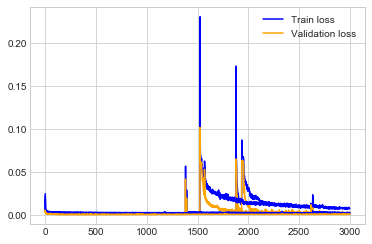

In [29]:
%%time

pred_len = 10
repeats = 5
i = 0
epochs = 10
result = []
for r in range(repeats):
    
    #initialize variables and model
    rmse_scores, mape_scores = list(), list()
    loss_train, loss_validate = list(), list()
    model = build_model([1,256,32,1])
    
    for e in range(epochs):
        
        # fit the model
        loss = model.fit(
            x_train,
            y_train,
            batch_size= 64,
            nb_epoch= 300,
            validation_split=0.2)
        
        # forecast test dataset
        predictions = predict_sequences_multiple(model, x_test, window_size, pred_len, True)
        predictions_usd = get_seq_real_values(predictions, df, rows)

        rmse, mape = calculate_error(predictions_usd, np.array(y_test_usd), pred_len)
        rmse_scores.append(rmse)
        mape_scores.append(mape)
        loss_train.extend(loss.history["loss"])
        loss_validate.extend(loss.history["val_loss"])
        print('%d %d) RMSE: %.3f   MAPE: %.2f' % (r+1, e+1, rmse[0], mape[0]))
        
    plt.plot(loss_train, color='blue', label = "Train loss" if r == 0 else "")
    plt.plot(loss_validate, color='orange', label = "Validation loss" if r == 0 else "")
    
    
    result.append((rmse_scores, mape_scores, loss_train, loss_validate))
    
plt.legend()
plt.savefig(os.path.join(images_path, 'epoches.png'))

    

In [3]:
%%time

repeats = 5
pred_len = 10
i = 0
windows_size = [30,40,50,60,70,80]
result = []

for w in windows_size:
    
    x_train, y_train, x_test, y_test, rows = transform_data(df, w, True)
    y_test_usd = get_real_value(y_test, df, rows)
    
    #initialize variables 
    rmse_scores, mape_scores = list(), list()
    loss_train, loss_validate = list(), list()

    
    for r in range(repeats):
        
        # fit the model
        model = build_model([1,256,32,1])
        loss = model.fit(
            x_train,
            y_train,
            batch_size= 64,
            nb_epoch= 300,
            validation_split=0.2)
        
        # forecast test dataset
        predictions = predict_sequences_multiple(model, x_test, w, pred_len, True)
        predictions_usd = get_seq_real_values(predictions, df, rows)

        rmse, mape = calculate_error(predictions_usd, np.array(y_test_usd), pred_len)
        rmse_scores.append(rmse)
        mape_scores.append(mape)
        loss_train.append(loss.history["loss"])
        loss_validate.append(loss.history["val_loss"])
        print('%d %d) RMSE: %.3f   MAPE: %.2f' % (w, r+1, rmse[0], mape[0]))
        
        
    result.append((rmse_scores, mape_scores, loss_train, loss_validate))

> Compilation Time :  0.038068532943725586
Train on 994 samples, validate on 249 samples
Epoch 1/300
994/994 [==============================] - 4s - loss: 0.0131 - acc: 0.0000e+00 - val_loss: 0.0062 - val_acc: 0.0000e+00
Epoch 2/300
994/994 [==============================] - 1s - loss: 0.0063 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 3/300
994/994 [==============================] - 1s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 4/300
994/994 [==============================] - 1s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 5/300
994/994 [==============================] - 1s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 6/300
994/994 [==============================] - 1s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 7/300
994/994 [==============================] - 1s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc

994/994 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 63/300
994/994 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 64/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 65/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 66/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 67/300
994/994 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 68/300
994/994 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 69/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0

994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 185/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 186/300
994/994 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 187/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 188/300
994/994 [==============================] - 1s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 189/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 190/300
994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 191/300
994/994 [==============================] - 1s - loss: 0.0024 -

994/994 [==============================] - 1s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 6/300
994/994 [==============================] - 1s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 7/300
994/994 [==============================] - 1s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 8/300
994/994 [==============================] - 1s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 9/300
994/994 [==============================] - 1s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 10/300
994/994 [==============================] - 1s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 11/300
994/994 [==============================] - 1s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 12/300
994/994 [==============================] - 1s - loss: 0.0034 - acc: 0.000

994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 128/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 129/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 130/300
994/994 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 131/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 132/300
994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 133/300
994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 134/300
994/994 [==============================] - 1s - loss: 0.0020 -

994/994 [==============================] - 1s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 250/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 251/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 252/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 253/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 254/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 255/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 256/300
994/994 [==============================] - 1s - loss: 0.0024 -

994/994 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 71/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 72/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 73/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 74/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 75/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 76/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 77/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0

994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 193/300
994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+0000e+
Epoch 194/300
994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 195/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 196/300
994/994 [==============================] - 1s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 197/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 198/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 199/300
994/994 [==============================] - 1s - loss: 0.00

994/994 [==============================] - 1s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 14/300
994/994 [==============================] - 1s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 15/300
994/994 [==============================] - 1s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 16/300
994/994 [==============================] - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 17/300
994/994 [==============================] - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 18/300
994/994 [==============================] - 1s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 19/300
994/994 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 20/300
994/994 [==============================] - 1s - loss: 0.0030 - acc: 0

994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 136/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 137/300
994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 138/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 139/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 140/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 141/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 142/300
994/994 [==============================] - 1s - loss: 0.0022 -

994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 258/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 259/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 260/300
994/994 [==============================] - 1s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 261/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 262/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 263/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 264/300
994/994 [==============================] - 1s - loss: 0.0022 -

994/994 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 79/300
994/994 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 80/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 81/300
994/994 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 82/300
994/994 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 83/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 84/300
994/994 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 85/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0

994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 201/300
994/994 [==============================] - 1s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 202/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 203/300
994/994 [==============================] - 1s - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 204/300
994/994 [==============================] - 1s - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 205/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 206/300
994/994 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 207/300
994/994 [==============================] - 1s - loss: 0.0023 -

987/987 [==============================] - 1s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 22/300
987/987 [==============================] - 1s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 23/300
987/987 [==============================] - 1s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 24/300
987/987 [==============================] - 1s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 25/300
987/987 [==============================] - 1s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 26/300
987/987 [==============================] - 1s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 27/300
987/987 [==============================] - 1s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 28/300
987/987 [==============================] - 1s - loss: 0.0033 - acc: 0

987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 144/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 145/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 146/300
987/987 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 147/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 148/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 149/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 150/300
987/987 [==============================] - 1s - loss: 0.0028 -

987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 266/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 267/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 268/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 269/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 270/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 271/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 272/300
987/987 [==============================] - 1s - loss: 0.0025 -

987/987 [==============================] - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 87/300
987/987 [==============================] - 1s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 88/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 89/300
987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 90/300
987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 91/300
987/987 [==============================] - 1s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 92/300
987/987 [==============================] - 1s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 93/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0

987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 209/300
987/987 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 210/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 211/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 212/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 213/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 214/300
987/987 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 215/300
987/987 [==============================] - 1s - loss: 0.0028 -

987/987 [==============================] - 1s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 30/300
987/987 [==============================] - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 31/300
987/987 [==============================] - 1s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 32/300
987/987 [==============================] - 1s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 33/300
987/987 [==============================] - 1s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 34/300
987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 35/300
987/987 [==============================] - 1s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 36/300
987/987 [==============================] - 1s - loss: 0.0034 - acc: 0

987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 152/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 153/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 154/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 155/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 156/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 157/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 158/300
987/987 [==============================] - 1s - loss: 0.0024 -

987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 274/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 275/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 276/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 277/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 278/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 279/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 280/300
987/987 [==============================] - 1s - loss: 0.0027 -

987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 95/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 96/300
987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 97/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 98/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 99/300
987/987 [==============================] - 1s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 100/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 101/300
987/987 [==============================] - 1s - loss: 0.0028 - acc:

987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 217/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 218/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 219/300
987/987 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 220/300
987/987 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 221/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 222/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 223/300
987/987 [==============================] - 1s - loss: 0.0025 -

987/987 [==============================] - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 38/300
987/987 [==============================] - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 39/300
987/987 [==============================] - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 40/300
987/987 [==============================] - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 41/300
987/987 [==============================] - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 42/300
987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 43/300
987/987 [==============================] - 1s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 44/300
987/987 [==============================] - 1s - loss: 0.0034 - acc: 0

987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 160/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 161/300
987/987 [==============================] - 1s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 162/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 163/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 164/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 165/300
987/987 [==============================] - 1s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 166/300
987/987 [==============================] - 1s - loss: 0.0027 -

987/987 [==============================] - 1s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 282/300
987/987 [==============================] - 1s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 283/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 284/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 285/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 286/300
987/987 [==============================] - 1s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 287/300
987/987 [==============================] - 1s - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 288/300
987/987 [==============================] - 1s - loss: 0.0024 -

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 103/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 104/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 105/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 106/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 107/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 108/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 109/300
980/980 [==============================] - 2s - loss: 0.0032 -

980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 225/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 226/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 227/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 228/300
980/980 [==============================] - 2s - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 229/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 230/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 231/300
980/980 [==============================] - 2s - loss: 0.0025 -

980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 46/300
980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 47/300
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 48/300
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 49/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 50/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 51/300
980/980 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 52/300
980/980 [==============================] - 2s - loss: 0.0039 - acc: 0

980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 168/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 169/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 170/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 171/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 172/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 173/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 174/300
980/980 [==============================] - 2s - loss: 0.0029 -

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 290/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 291/300
980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 292/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 293/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 294/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 295/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 296/300
980/980 [==============================] - 2s - loss: 0.0029 -

980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 111/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 112/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 113/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 114/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 115/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 116/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 117/300
980/980 [==============================] - 2s - loss: 0.0030 -

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 233/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 234/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 235/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 236/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 237/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 238/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 239/300
980/980 [==============================] - 2s - loss: 0.0027 -

980/980 [==============================] - 2s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 54/300
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 55/300
980/980 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 56/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 57/300
980/980 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 58/300
980/980 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 59/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 60/300
980/980 [==============================] - 2s - loss: 0.0033 - acc: 0

980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 176/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 177/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 178/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 179/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 180/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 181/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 182/300
980/980 [==============================] - 2s - loss: 0.0029 -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 298/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 299/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 300/300
980/980 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
50 4) RMSE: 198.561   MAPE: 0.04
> Compilation Time :  0.036095619201660156
Train on 980 samples, validate on 245 samples
Epoch 1/300
980/980 [==============================] - 4s - loss: 0.0210 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 2/300
980/980 [==============================] - 2s - loss: 0.0071 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 3/300
980/980 [==============================] - 2s - loss: 0.0059 - acc: 0.0000e+00 -

980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 119/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 120/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 121/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 122/300
980/980 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 123/300
980/980 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 124/300
980/980 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 125/300
980/980 [==============================] - 2s - loss: 0.0027 -

980/980 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 241/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 242/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 243/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 244/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 245/300
980/980 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 246/300
980/980 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 247/300
980/980 [==============================] - 2s - loss: 0.0029 -

> Compilation Time :  0.03508639335632324
Train on 972 samples, validate on 244 samples
Epoch 1/300
972/972 [==============================] - 5s - loss: 0.0212 - acc: 0.0000e+00 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 2/300
972/972 [==============================] - 2s - loss: 0.0077 - acc: 0.0000e+00 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 3/300
972/972 [==============================] - 2s - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 4/300
972/972 [==============================] - 2s - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 5/300
972/972 [==============================] - 2s - loss: 0.0052 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 6/300
972/972 [==============================] - 2s - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 7/300
972/972 [==============================] - 2s - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc:

972/972 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 63/300
972/972 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 64/300
972/972 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 65/300
972/972 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 66/300
972/972 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 67/300
972/972 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 68/300
972/972 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 69/300
972/972 [==============================] - 2s - loss: 0.0034 - acc: 0

972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 185/300
972/972 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 186/300
972/972 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 187/300
972/972 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 188/300
972/972 [==============================] - 3s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 189/300
972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 190/300
972/972 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 191/300
972/972 [==============================] - 3s - loss: 0.0031 -

972/972 [==============================] - 3s - loss: 0.0068 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 6/300
972/972 [==============================] - 3s - loss: 0.0063 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 7/300
972/972 [==============================] - 3s - loss: 0.0051 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 8/300
972/972 [==============================] - 3s - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 9/300
972/972 [==============================] - 3s - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 10/300
972/972 [==============================] - 3s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 11/300
972/972 [==============================] - 3s - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 12/300
972/972 [==============================] - 3s - loss: 0.0047 - acc: 0.000

972/972 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 128/300
972/972 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 129/300
972/972 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 130/300
972/972 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 131/300
972/972 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 132/300
972/972 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 133/300
972/972 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 134/300
972/972 [==============================] - 3s - loss: 0.0033 -

972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 250/300
972/972 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 251/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 252/300
972/972 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 253/300
972/972 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 254/300
972/972 [==============================] - 2s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 255/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 256/300
972/972 [==============================] - 2s - loss: 0.0029 -

972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 71/300
972/972 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 72/300
972/972 [==============================] - 2s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 73/300
972/972 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 74/300
972/972 [==============================] - 2s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 75/300
972/972 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 76/300
972/972 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 77/300
972/972 [==============================] - 2s - loss: 0.0036 - acc: 0

972/972 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 193/300
972/972 [==============================] - 2s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 194/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 195/300
972/972 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 196/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 197/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 198/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 199/300
972/972 [==============================] - 2s - loss: 0.0031 -

972/972 [==============================] - 2s - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 14/300
972/972 [==============================] - 2s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 15/300
972/972 [==============================] - 2s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 16/300
972/972 [==============================] - 2s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 17/300
972/972 [==============================] - 2s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 18/300
972/972 [==============================] - 2s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 19/300
972/972 [==============================] - 2s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 20/300
972/972 [==============================] - 2s - loss: 0.0039 - acc: 0

972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 136/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 137/300
972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 138/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 139/300
972/972 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 140/300
972/972 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 141/300
972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 142/300
972/972 [==============================] - 2s - loss: 0.0033 -

972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 258/300
972/972 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 259/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 260/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 261/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 262/300
972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 263/300
972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 264/300
972/972 [==============================] - 2s - loss: 0.0029 -

972/972 [==============================] - 2s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 79/300
972/972 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 80/300
972/972 [==============================] - 2s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 81/300
972/972 [==============================] - 2s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 82/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 83/300
972/972 [==============================] - 2s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 84/300
972/972 [==============================] - 2s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 85/300
972/972 [==============================] - 2s - loss: 0.0032 - acc: 0

972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 201/300
972/972 [==============================] - 2s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 202/300
972/972 [==============================] - 2s - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 203/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 204/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 205/300
972/972 [==============================] - 2s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 206/300
972/972 [==============================] - 2s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 207/300
972/972 [==============================] - 2s - loss: 0.0031 -

965/965 [==============================] - 3s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 22/300
965/965 [==============================] - 3s - loss: 0.0049 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 23/300
965/965 [==============================] - 3s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 24/300
965/965 [==============================] - 3s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 25/300
965/965 [==============================] - 3s - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 26/300
965/965 [==============================] - 3s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 27/300
965/965 [==============================] - 3s - loss: 0.0049 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 28/300
965/965 [==============================] - 3s - loss: 0.0047 - acc: 0

965/965 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 144/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 145/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 146/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 147/300
965/965 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 148/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 149/300
965/965 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 150/300
965/965 [==============================] - 3s - loss: 0.0033 -

965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 266/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 267/300
965/965 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 9.9850e-04 - val_acc: 0.0000e+00
Epoch 268/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 269/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 270/300
965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 271/300
965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 272/300
965/965 [==============================] - 3s - loss: 0.00

965/965 [==============================] - 3s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 87/300
965/965 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 88/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 89/300
965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 90/300
965/965 [==============================] - 3s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 91/300
965/965 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 92/300
965/965 [==============================] - 3s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 93/300
965/965 [==============================] - 3s - loss: 0.0032 - acc: 0

965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 209/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 210/300
965/965 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 211/300
965/965 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 212/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 213/300
965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 214/300
965/965 [==============================] - 3s - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 215/300
965/965 [==============================] - 3s - loss: 0.0032 -

965/965 [==============================] - 3s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 30/300
965/965 [==============================] - 3s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 31/300
965/965 [==============================] - 3s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 32/300
965/965 [==============================] - 3s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 33/300
965/965 [==============================] - 3s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 34/300
965/965 [==============================] - 3s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 35/300
965/965 [==============================] - 3s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+0000
Epoch 36/300
965/965 [==============================] - 3s - loss: 0.0039 - acc:

965/965 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 152/300
965/965 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 153/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 154/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 155/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 156/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 157/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 158/300
965/965 [==============================] - 3s - loss: 0.0036 -

965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 274/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 275/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 276/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 277/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 278/300
965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 279/300
965/965 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 280/300
965/965 [==============================] - 3s - loss: 0.0033 -

965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 95/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 96/300
965/965 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 97/300
965/965 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 98/300
965/965 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 99/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 100/300
965/965 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 101/300
965/965 [==============================] - 3s - loss: 0.0037 - acc:

965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 217/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 218/300
965/965 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 219/300
965/965 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 220/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 221/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 222/300
965/965 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 223/300
965/965 [==============================] - 3s - loss: 0.0030 -

965/965 [==============================] - 3s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 38/300
965/965 [==============================] - 3s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 39/300
965/965 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 40/300
965/965 [==============================] - 3s - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 41/300
965/965 [==============================] - 3s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 42/300
965/965 [==============================] - 3s - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 43/300
965/965 [==============================] - 3s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 44/300
965/965 [==============================] - 3s - loss: 0.0049 - acc: 0

965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 160/300
965/965 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 161/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 162/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 163/300
965/965 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 164/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 165/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 166/300
965/965 [==============================] - 3s - loss: 0.0033 -

965/965 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 282/300
965/965 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 283/300
965/965 [==============================] - 3s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 284/300
965/965 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 285/300
965/965 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 286/300
965/965 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 287/300
965/965 [==============================] - 3s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 288/300
965/965 [==============================] - 3s - loss: 0.0033 -

958/958 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 103/300
958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 104/300
958/958 [==============================] - 3s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 105/300
958/958 [==============================] - 3s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 106/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 107/300
958/958 [==============================] - 3s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 108/300
958/958 [==============================] - 3s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 109/300
958/958 [==============================] - 3s - loss: 0.0038 -

958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 225/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 226/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 227/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 228/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 229/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 230/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 231/300
958/958 [==============================] - 3s - loss: 0.0035 -

958/958 [==============================] - 3s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 46/300
958/958 [==============================] - 3s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 47/300
958/958 [==============================] - 3s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 48/300
958/958 [==============================] - 3s - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 49/300
958/958 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 50/300
958/958 [==============================] - 3s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 51/300
958/958 [==============================] - 3s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 52/300
958/958 [==============================] - 3s - loss: 0.0038 - acc: 0

958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 168/300
958/958 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 169/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 170/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 171/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 172/300
958/958 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 173/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 174/300
958/958 [==============================] - 3s - loss: 0.0037 -

958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 290/300
958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 291/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 292/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 293/300
958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 294/300
958/958 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 295/300
958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 296/300
958/958 [==============================] - 3s - loss: 0.0033 -

958/958 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 111/300
958/958 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 112/300
958/958 [==============================] - 3s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 113/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 114/300
958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 115/300
958/958 [==============================] - 3s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 116/300
958/958 [==============================] - 3s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 117/300
958/958 [==============================] - 3s - loss: 0.0037 -

958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 233/300
958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 234/300
958/958 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 235/300
958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 236/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 9.7949e-04 - val_acc: 0.0000e+00
Epoch 237/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 238/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 239/300
958/958 [==============================] - 3s - loss: 0.00

958/958 [==============================] - 3s - loss: 0.0040 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 54/300
958/958 [==============================] - 3s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 55/300
958/958 [==============================] - 3s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 56/300
958/958 [==============================] - 3s - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 57/300
958/958 [==============================] - 3s - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 58/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 59/300
958/958 [==============================] - 3s - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 60/300
958/958 [==============================] - 3s - loss: 0.0035 - acc: 0

958/958 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 176/300
958/958 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 177/300
958/958 [==============================] - 3s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 178/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 179/300
958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 180/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 181/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 182/300
958/958 [==============================] - 3s - loss: 0.0038 -

958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 298/300
958/958 [==============================] - 3s - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 299/300
958/958 [==============================] - 3s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 300/300
958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
80 4) RMSE: 390.870   MAPE: 0.09
> Compilation Time :  0.03125333786010742
Train on 958 samples, validate on 240 samples
Epoch 1/300
958/958 [==============================] - 6s - loss: 0.0324 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 2/300
958/958 [==============================] - 3s - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 3/300
958/958 [==============================] - 3s - loss: 0.0079 - acc: 0.0000e+00 - 

958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 119/300
958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 120/300
958/958 [==============================] - 3s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 121/300
958/958 [==============================] - 3s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 122/300
958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 123/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 124/300
958/958 [==============================] - 3s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 125/300
958/958 [==============================] - 3s - loss: 0.0035 -

958/958 [==============================] - 3s - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 241/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 242/300
958/958 [==============================] - 3s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 243/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 244/300
958/958 [==============================] - 3s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 245/300
958/958 [==============================] - 3s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 246/300
958/958 [==============================] - 3s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 247/300
958/958 [==============================] - 3s - loss: 0.0032 -

In [41]:
#with open("result_window", 'wb') as f:
#    pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)
rmse = [np.mean(r[0], axis = 0) for r in result]
mape = [np.mean(r[1], axis = 0) for r in result]

mape = pd.DataFrame(mape, index = windows_size).transpose()
rmse = pd.DataFrame(rmse, index = windows_size).transpose()

In [42]:
rmse.style.apply(highlight_min, axis=1)

In [43]:
mape.style.apply(highlight_min, axis=1)

In [44]:
train = [np.mean(r[2], axis = 0) for r in result]

In [45]:
train  = pd.DataFrame(train , index = windows_size).transpose()

*Rezultatus nera visai korektiska lygint, nes imčių dydžiai skiriasi 
*Geriausi rezultatai gauti su 40 ilgio langu, bet gali buti, kad ilgesnio lango duomenims reikia ilgesnio laiko treniruotis kokybiskesniam prognozavimui, kitavertus duomenis yra labai triuksmingi

In [4]:
#with open("result_window", 'wb') as f:
#    pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
*Min max
*ratio min max
*ratio tanh 
*tanh